In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from math import pi
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
gca = pd.read_html('https://fbref.com/en/comps/Big5/2018-2019/gca/players/2018-2019-Big-5-European-Leagues-Stats')[0]

In [51]:
shooting = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/shooting/players/2019-2020-Big-5-European-Leagues-Stats')[0]
passing = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/passing/players/2019-2020-Big-5-European-Leagues-Stats')[0]
pass_types = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/passing_types/players/2019-2020-Big-5-European-Leagues-Stats')[0]
gca = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/gca/players/2019-2020-Big-5-European-Leagues-Stats')[0]
defence = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/defense/players/2019-2020-Big-5-European-Leagues-Stats')[0]
possession = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/possession/players/2019-2020-Big-5-European-Leagues-Stats')[0]
misc = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/misc/players/2019-2020-Big-5-European-Leagues-Stats')[0]


In [52]:
def fbref_dropheader(df):
    my_df = df.copy()
    my_df = my_df.droplevel(0, axis=1)
    return(my_df)

In [53]:
shooting = fbref_dropheader(shooting)
passing = fbref_dropheader(passing)
pass_types = fbref_dropheader(pass_types)
gca = fbref_dropheader(gca)
defence = fbref_dropheader(defence)
possession = fbref_dropheader(possession)
misc = fbref_dropheader(misc)

In [54]:
# shooting.to_csv('fbref_shooting_18-19.csv', index=False)
# passing.to_csv('fbref_passing_18-19.csv', index=False)
# pass_types.to_csv('fbref_pass_types_18-19.csv', index=False)
# gca.to_csv('fbref_gca_18-19.csv', index=False)
# defence.to_csv('fbref_defence_18-19.csv', index=False)
# possession.to_csv('fbref_possession_18-19.csv', index=False)
# misc.to_csv('fbref_misc_18-19.csv', index=False)

In [55]:
shooting.to_csv('fbref_shooting_19-20.csv', index=False)
passing.to_csv('fbref_passing_19-20.csv', index=False)
pass_types.to_csv('fbref_pass_types_19-20.csv', index=False)
gca.to_csv('fbref_gca_19-20.csv', index=False)
defence.to_csv('fbref_defence_19-20.csv', index=False)
possession.to_csv('fbref_possession_19-20.csv', index=False)
misc.to_csv('fbref_misc_19-20.csv', index=False)

In [56]:
# shooting = pd.read_csv('fbref_shooting_18-19.csv')
# passing = pd.read_csv('fbref_passing_18-19.csv')
# pass_types = pd.read_csv('fbref_pass_types_18-19.csv')
# gca = pd.read_csv('fbref_gca_18-19.csv')
# defence = pd.read_csv('fbref_defence_18-19.csv')
# possession = pd.read_csv('fbref_possession_18-19.csv')
# misc = pd.read_csv('fbref_misc_18-19.csv')

In [57]:
shooting = pd.read_csv('fbref_shooting_19-20.csv')
passing = pd.read_csv('fbref_passing_19-20.csv')
pass_types = pd.read_csv('fbref_pass_types_19-20.csv')
gca = pd.read_csv('fbref_gca_19-20.csv')
defence = pd.read_csv('fbref_defence_19-20.csv')
possession = pd.read_csv('fbref_possession_19-20.csv')
misc = pd.read_csv('fbref_misc_19-20.csv')

In [58]:
def fbref_cleaner(df):
    all_columns = list(df.columns)
    unwanted_columns = {'Rk','Player','Nation','Pos','Squad','Comp','Age','Born','Matches'}
    index_columns = [ele for ele in all_columns if ele not in unwanted_columns]
    num_df = df.loc[:,index_columns].apply(pd.to_numeric, errors='coerce')
    num_df.fillna(0, inplace=True)
    master_df = pd.concat([df[['Player','Nation','Pos','Squad','Comp','Age','Born']], num_df], axis = 1)
    return master_df

In [59]:
shooting = fbref_cleaner(shooting)
passing = fbref_cleaner(passing)
pass_types = fbref_cleaner(pass_types)
gca = fbref_cleaner(gca)
defence = fbref_cleaner(defence)
possession = fbref_cleaner(possession)
misc = fbref_cleaner(misc)

In [60]:
# misc.columns.tolist()

In [61]:
def fbref_shooting(df):
    df.rename(columns={
    'Gls':'Goals',
    'Sh':'Shots',
    'SoT':'Shots on Target',
    'SoT%':'Shots on Target %',
    'Sh/90':'Shots Total p90',
    'SoT/90':'Shots on Target p90',
    'G/Sh':'Goals per shot',
    'G/SoT':'Goals per shot on target',
    'FK':'Shots from Free Kicks',
    'PK':'Penalty Kicks scored',
    'PKatt':'Penalty Kicks attempted',
    'npxG':'Non-penalty xG'
}, inplace=True)
    return df 

In [62]:
shooting=fbref_shooting(shooting)
shooting

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Goals,Shots,Shots on Target,Shots on Target %,Shots Total p90,Shots on Target p90,Goals per shot,Goals per shot on target,Shots from Free Kicks,Penalty Kicks scored,Penalty Kicks attempted,xG,Non-penalty xG,npxG/Sh,G-xG,np:G-xG
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,3.0,26.0,5.0,19.2,0.93,0.18,0.08,0.40,3.0,1.0,1.0,2.4,1.6,0.06,0.6,0.4
1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,0.0,14.0,4.0,28.6,0.39,0.11,0.00,0.00,0.0,0.0,0.0,0.5,0.5,0.04,-0.5,-0.5
2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,3.0,19.0,5.0,26.3,0.68,0.18,0.16,0.60,0.0,0.0,0.0,1.3,1.3,0.07,1.7,1.7
3,Suleiman Abdullahi,ng NGA,"FW,MF",Union Berlin,de Bundesliga,22,1996,1.7,1.0,6.0,3.0,50.0,3.44,1.72,0.17,0.33,0.0,0.0,0.0,1.3,1.3,0.21,-0.3,-0.3
4,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,20.2,1.0,33.0,7.0,21.2,1.63,0.35,0.03,0.14,3.0,0.0,0.0,1.6,1.6,0.05,-0.6,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,Bongani Zungu,za RSA,MF,Amiens,fr Ligue 1,26,1992,11.0,1.0,7.0,1.0,14.3,0.64,0.09,0.14,1.00,0.0,0.0,0.0,0.3,0.3,0.04,0.7,0.7
2837,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,21,1997,0.1,0.0,1.0,0.0,0.0,7.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0
2838,David Zurutuza,es ESP,MF,Real Sociedad,es La Liga,33,1986,1.7,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2839,Martin Ødegaard,no NOR,MF,Real Sociedad,es La Liga,20,1998,28.1,4.0,49.0,17.0,34.7,1.75,0.61,0.08,0.24,4.0,0.0,0.0,3.2,3.2,0.07,0.8,0.8


In [63]:
def fbref_passing(df):
    df.rename(columns={
        'Cmp':'Passes Completed',
        'Att':'Passes Attempted',
        'Cmp%':'Pass Completion %',
        'Cmp.1':'Short Passes Completed',
        'Att.1':'Short Passes Attempted',
        'Cmp%.1':'Short Pass Completion %',
        'Cmp.2':'Medium Passes Completed',
        'Att.2':'Medium Passes Attempted',
        'Cmp%.2':'Medium Pass Completion %',
        'Cmp.3':'Long Passes Completed',
        'Att.3':'Long Passes Attempted',
        'Cmp%.3':'Long Pass Completion %',
        'Ast':'Assists',
        'KP':'Key Passes',
        '1/3':'Passes into Final Third',
        'PPA':'Passes into Penalty Area',
        'CrsPA':'Crosses into Penalty Area',
        'Prog':'Progressive Passes'
}, inplace=True)
    return df 

In [64]:
passing=fbref_passing(passing)
passing

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Passes Completed,Passes Attempted,Pass Completion %,TotDist,PrgDist,Short Passes Completed,Short Passes Attempted,Short Pass Completion %,Medium Passes Completed,Medium Passes Attempted,Medium Pass Completion %,Long Passes Completed,Long Passes Attempted,Long Pass Completion %,Assists,xA,A-xA,Key Passes,Passes into Final Third,Passes into Penalty Area,Crosses into Penalty Area,Progressive Passes
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,1227.0,1558.0,78.8,21251.0,9280.0,16.0,56.0,28.6,1018.0,1172.0,86.9,193.0,330.0,58.5,2.0,3.2,-1.2,32.0,86.0,25.0,5.0,216.0
1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,1316.0,1684.0,78.1,20293.0,6834.0,30.0,94.0,31.9,1136.0,1316.0,86.3,150.0,274.0,54.7,1.0,3.4,-2.4,24.0,43.0,32.0,13.0,122.0
2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,1328.0,1515.0,87.7,29513.0,9041.0,9.0,23.0,39.1,851.0,924.0,92.1,468.0,568.0,82.4,0.0,0.1,-0.1,2.0,45.0,3.0,0.0,83.0
3,Suleiman Abdullahi,ng NGA,"FW,MF",Union Berlin,de Bundesliga,22,1996,1.7,18.0,40.0,45.0,316.0,132.0,0.0,5.0,0.0,16.0,28.0,57.1,2.0,7.0,28.6,0.0,0.2,-0.2,1.0,2.0,2.0,1.0,5.0
4,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,20.2,801.0,957.0,83.7,14638.0,3850.0,6.0,21.0,28.6,632.0,686.0,92.1,163.0,250.0,65.2,2.0,1.4,0.6,26.0,85.0,6.0,4.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,Bongani Zungu,za RSA,MF,Amiens,fr Ligue 1,26,1992,11.0,437.0,538.0,81.2,8324.0,2354.0,9.0,15.0,60.0,332.0,386.0,86.0,96.0,137.0,70.1,0.0,0.3,-0.3,3.0,39.0,2.0,1.0,53.0
2837,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,21,1997,0.1,4.0,4.0,100.0,54.0,4.0,0.0,0.0,0.0,4.0,4.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2838,David Zurutuza,es ESP,MF,Real Sociedad,es La Liga,33,1986,1.7,61.0,82.0,74.4,1131.0,236.0,3.0,4.0,75.0,45.0,58.0,77.6,13.0,20.0,65.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,6.0
2839,Martin Ødegaard,no NOR,MF,Real Sociedad,es La Liga,20,1998,28.1,1308.0,1617.0,80.9,22526.0,6909.0,28.0,65.0,43.1,1056.0,1185.0,89.1,224.0,367.0,61.0,6.0,5.2,0.8,60.0,141.0,73.0,2.0,249.0


In [65]:
def fbref_pass_types(df):
    df.rename(columns={
        'Att':'Passes Attempted',
        'Live':'Live Ball passes',
        'Dead':'Dead Ball passes',
        'FK':'Free Kick passes',
        'TB':'Through Balls',
        'Press':'Passes under pressure',
        'Sw':'Switches',
        'Crs':'Crosses',
        'CK':'Corner Kicks',
        'In':'CK in',
        'Out':'CK out',
        'Str':'CK str',
        'Ground':'Ground passes',
        'Low':'Low passes',
        'High':'High passes',
        'Left':'Left passes',
        'Right':'Right passes',
        'Head':'Head passes',
        'TI':'Throw ins',
        'Other':'Other passes',
        'Cmp':'Passes completed',
        'Off':'Passes offside',
        'Out.1':'Pass out of bounds',
        'Int':'Passes intercepted',
        'Blocks':'Passes blocked'
}, inplace=True)
    return df 

In [66]:
pass_types=fbref_pass_types(pass_types)
pass_types

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Passes Attempted,Live Ball passes,Dead Ball passes,Free Kick passes,Through Balls,Passes under pressure,Switches,Crosses,Corner Kicks,CK in,CK out,CK str,Ground passes,Low passes,High passes,Left passes,Right passes,Head passes,Throw ins,Other passes,Passes completed,Passes offside,Pass out of bounds,Passes intercepted,Passes blocked
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,1558.0,1175.0,383.0,62.0,0.0,222.0,35.0,44.0,45.0,23.0,15.0,3.0,930.0,322.0,306.0,997.0,256.0,21.0,275.0,3.0,1227.0,8.0,14.0,36.0,47.0
1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,1684.0,1356.0,328.0,27.0,1.0,290.0,10.0,54.0,0.0,0.0,0.0,0.0,1018.0,391.0,275.0,219.0,1102.0,45.0,301.0,2.0,1316.0,0.0,33.0,22.0,70.0
2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,1515.0,1437.0,78.0,75.0,1.0,184.0,49.0,1.0,0.0,0.0,0.0,0.0,1142.0,141.0,232.0,1008.0,411.0,66.0,3.0,3.0,1328.0,3.0,21.0,25.0,12.0
3,Suleiman Abdullahi,ng NGA,"FW,MF",Union Berlin,de Bundesliga,22,1996,1.7,40.0,40.0,0.0,0.0,0.0,8.0,2.0,7.0,0.0,0.0,0.0,0.0,21.0,9.0,10.0,8.0,23.0,5.0,0.0,0.0,18.0,0.0,1.0,1.0,6.0
4,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,20.2,957.0,864.0,93.0,42.0,1.0,157.0,50.0,18.0,47.0,16.0,16.0,7.0,684.0,113.0,160.0,104.0,788.0,42.0,4.0,8.0,801.0,3.0,23.0,11.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,Bongani Zungu,za RSA,MF,Amiens,fr Ligue 1,26,1992,11.0,538.0,523.0,15.0,13.0,1.0,99.0,24.0,3.0,0.0,0.0,0.0,0.0,365.0,70.0,103.0,27.0,457.0,33.0,0.0,7.0,437.0,0.0,7.0,19.0,3.0
2837,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,21,1997,0.1,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2838,David Zurutuza,es ESP,MF,Real Sociedad,es La Liga,33,1986,1.7,82.0,78.0,4.0,3.0,0.0,29.0,4.0,2.0,0.0,0.0,0.0,0.0,48.0,13.0,21.0,15.0,54.0,6.0,1.0,0.0,61.0,1.0,2.0,1.0,3.0
2839,Martin Ødegaard,no NOR,MF,Real Sociedad,es La Liga,20,1998,28.1,1617.0,1433.0,184.0,89.0,10.0,292.0,48.0,38.0,80.0,33.0,21.0,8.0,1180.0,196.0,241.0,1416.0,145.0,30.0,12.0,6.0,1308.0,10.0,22.0,36.0,31.0


In [67]:
def fbref_misc(df):
    df.rename(columns={
        'Fls':'Fouls commited',
        'Fld':'Fouls drawn',
        'Off':'Offsides',
        'Crs':'Crosses',
        'Int':'Interceptions',
        'TklW':'Tackles won',
        'PKwon':'Penalties won',
        'PKcon':'Penalties conceded',
        'OG':'Own goals',
        'Recov':'Recoveries',
        'Won':'Aerial Duels won',
        'Lost':'Aerial Duels lost',
        'Won%':'Aerial win %'
}, inplace=True)
    return df 

In [68]:
misc=fbref_misc(misc)
misc

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,CrdY,CrdR,2CrdY,Fouls commited,Fouls drawn,Offsides,Crosses,Interceptions,Tackles won,Penalties won,Penalties conceded,Own goals,Recoveries,Aerial Duels won,Aerial Duels lost,Aerial win %
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,0.0,0.0,0.0,9.0,8.0,2.0,44.0,23.0,32.0,0.0,0.0,1.0,243.0,12.0,17.0,41.4
1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,7.0,0.0,0.0,29.0,49.0,3.0,54.0,20.0,36.0,1.0,0.0,0.0,281.0,23.0,42.0,35.4
2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,0.0,0.0,0.0,21.0,20.0,0.0,1.0,24.0,37.0,0.0,1.0,0.0,226.0,86.0,42.0,67.2
3,Suleiman Abdullahi,ng NGA,"FW,MF",Union Berlin,de Bundesliga,22,1996,1.7,1.0,0.0,0.0,0.0,0.0,3.0,7.0,1.0,1.0,0.0,0.0,0.0,15.0,6.0,11.0,35.3
4,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,20.2,5.0,0.0,0.0,55.0,43.0,1.0,18.0,17.0,41.0,0.0,1.0,0.0,194.0,14.0,19.0,42.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,Bongani Zungu,za RSA,MF,Amiens,fr Ligue 1,26,1992,11.0,4.0,0.0,0.0,24.0,15.0,1.0,3.0,18.0,12.0,0.0,0.0,0.0,133.0,18.0,25.0,41.9
2837,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,21,1997,0.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,100.0
2838,David Zurutuza,es ESP,MF,Real Sociedad,es La Liga,33,1986,1.7,0.0,0.0,0.0,3.0,3.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,14.0,7.0,8.0,46.7
2839,Martin Ødegaard,no NOR,MF,Real Sociedad,es La Liga,20,1998,28.1,3.0,0.0,0.0,24.0,37.0,0.0,38.0,15.0,18.0,0.0,0.0,0.0,231.0,11.0,20.0,35.5


In [69]:
def fbref_possession(df):
    df.rename(columns={
        'Def Pen':'Def Pen touches',
        'Def 3rd': 'Def 3rd touches',
        'Mid 3rd':'Mid 3rd touches',
        'Att 3rd':'Att 3rd touches',
        'Att Pen':'Touches in Box',
        'Live':'Live ball touches',
        'Succ':'Successful Dribbles',
        'Att':'Attempted Dribbles',
        'Succ%':'Successful Dribble %',
        '#Pl':'Players dribbled past',
        'TotDist':'Total Distance carries',
        'PrgDist':'ProgDist carries',
        'Targ':'Pass Targets',
        'Rec':'Passes Received',
        'Rec%':'Passes Received %',
        'Dispos':'Passes Dispossed'
}, inplace=True)
    return df

In [70]:
possession=fbref_possession(possession)
possession

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Touches,Def Pen touches,Def 3rd touches,Mid 3rd touches,Att 3rd touches,Touches in Box,Live ball touches,Successful Dribbles,Attempted Dribbles,Successful Dribble %,Players dribbled past,Megs,Carries,Total Distance carries,ProgDist carries,Pass Targets,Passes Received,Passes Received %,Miscon,Passes Dispossed
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,1839.0,97.0,531.0,883.0,531.0,50.0,1458.0,18.0,36.0,50.0,18.0,2.0,1000.0,5651.0,3129.0,1079.0,994.0,92.1,21.0,16.0
1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,2133.0,178.0,804.0,902.0,594.0,52.0,1821.0,49.0,94.0,52.1,55.0,2.0,1321.0,9489.0,5439.0,1399.0,1244.0,88.9,39.0,48.0
2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,1856.0,256.0,1131.0,801.0,61.0,27.0,1782.0,21.0,26.0,80.8,21.0,0.0,1201.0,7673.0,4306.0,1266.0,1236.0,97.6,12.0,8.0
3,Suleiman Abdullahi,ng NGA,"FW,MF",Union Berlin,de Bundesliga,22,1996,1.7,62.0,1.0,9.0,22.0,33.0,10.0,62.0,2.0,4.0,50.0,3.0,1.0,37.0,279.0,177.0,77.0,39.0,50.6,6.0,2.0
4,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,20.2,1176.0,22.0,211.0,754.0,283.0,20.0,1091.0,12.0,22.0,54.5,12.0,0.0,782.0,4298.0,2116.0,854.0,759.0,88.9,14.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,Bongani Zungu,za RSA,MF,Amiens,fr Ligue 1,26,1992,11.0,659.0,27.0,144.0,452.0,85.0,5.0,649.0,5.0,11.0,45.5,8.0,0.0,437.0,1825.0,823.0,443.0,410.0,92.6,8.0,13.0
2837,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,21,1997,0.1,8.0,0.0,2.0,4.0,2.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,4.0,23.0,11.0,6.0,5.0,83.3,0.0,2.0
2838,David Zurutuza,es ESP,MF,Real Sociedad,es La Liga,33,1986,1.7,103.0,3.0,29.0,63.0,19.0,0.0,100.0,1.0,2.0,50.0,1.0,0.0,65.0,305.0,127.0,88.0,71.0,80.7,2.0,3.0
2839,Martin Ødegaard,no NOR,MF,Real Sociedad,es La Liga,20,1998,28.1,1904.0,13.0,191.0,1102.0,772.0,69.0,1730.0,63.0,94.0,67.0,65.0,1.0,1459.0,9565.0,5162.0,1582.0,1401.0,88.6,45.0,54.0


In [71]:
def fbref_defence(df):
    df.rename(columns={
        'Tkl':'No. Tackels',
        'TklW':'No Tackels won',
        'Def 3rd':'Def 3rd tackles',
        'Mid 3rd':'Mid 3rd tackles',
        'Att 3rd':'Att 3rd tackles',
        'Tkl.1':'Tackles v Dribbles',
        'Att':'Tackles v Dribble attempts',
        'Tkl%':'% of dribblers tackled',
        'Past':'No of times dribbled past',
        'Press':'Pressures',
        'Succ':'Succ Pressures',
        '%':'Succ Pressures %',
        'Def 3rd.1':'Def 3rd Pressures',
        'Mid 3rd.1':'Mid 3rd Pressures',
        'Att 3rd.1':'Att 3rd Pressures',
        'Sh':'Blocked shots',
        'Pass':'Blocked pass',
        'Int':'Interceptions',
        'Clr':'Clearances',
        'Err':'Errors'
}, inplace=True)
    return df 

In [72]:
defence=fbref_defence(defence)
defence

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,No. Tackels,No Tackels won,Def 3rd tackles,Mid 3rd tackles,Att 3rd tackles,Tackles v Dribbles,Tackles v Dribble attempts,% of dribblers tackled,No of times dribbled past,Pressures,Succ Pressures,Succ Pressures %,Def 3rd Pressures,Mid 3rd Pressures,Att 3rd Pressures,Blocks,Blocked shots,ShSv,Blocked pass,Interceptions,Tkl+Int,Clearances,Errors
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,51.0,32.0,33.0,16.0,2.0,22.0,54.0,40.7,32.0,267.0,74.0,27.7,159.0,71.0,37.0,57.0,13.0,1.0,44.0,23.0,74.0,67.0,3.0
1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,64.0,36.0,40.0,17.0,7.0,21.0,45.0,46.7,24.0,487.0,132.0,27.1,283.0,142.0,62.0,100.0,30.0,2.0,70.0,20.0,84.0,86.0,0.0
2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,61.0,37.0,43.0,16.0,2.0,14.0,28.0,50.0,14.0,299.0,111.0,37.1,189.0,97.0,13.0,43.0,19.0,0.0,24.0,24.0,85.0,166.0,1.0
3,Suleiman Abdullahi,ng NGA,"FW,MF",Union Berlin,de Bundesliga,22,1996,1.7,1.0,1.0,1.0,0.0,0.0,1.0,3.0,33.3,2.0,25.0,9.0,36.0,9.0,11.0,5.0,3.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0
4,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,20.2,60.0,41.0,24.0,34.0,2.0,24.0,62.0,38.7,38.0,417.0,114.0,27.3,121.0,233.0,63.0,18.0,3.0,0.0,15.0,17.0,77.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,Bongani Zungu,za RSA,MF,Amiens,fr Ligue 1,26,1992,11.0,26.0,12.0,9.0,13.0,4.0,14.0,34.0,41.2,20.0,227.0,68.0,30.0,62.0,136.0,29.0,19.0,4.0,0.0,15.0,18.0,44.0,26.0,1.0
2837,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,21,1997,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,33.3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2838,David Zurutuza,es ESP,MF,Real Sociedad,es La Liga,33,1986,1.7,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,26.0,6.0,23.1,12.0,12.0,2.0,2.0,0.0,0.0,2.0,2.0,4.0,6.0,0.0
2839,Martin Ødegaard,no NOR,MF,Real Sociedad,es La Liga,20,1998,28.1,28.0,18.0,7.0,16.0,5.0,6.0,36.0,16.7,30.0,517.0,125.0,24.2,96.0,263.0,158.0,20.0,0.0,0.0,20.0,15.0,43.0,14.0,0.0


In [73]:
def fbref_gca(df):
    df.rename(columns={
        'SCA':'Shot-Creating Actions',
        'SCA90':'Shot-Creating Actions p90',
        'PassLive':'SCA pass live',
        'PassDead':'SCA pass dead',
        'Drib':'SCA from dribbles',
        'Sh':'SCA shots',
        'Fld':'SCA from fouls',
        'GCA':'Goal-Creating Actions',
        'GCA90':'Goal-Creating Actions p90',
        'PassLive.1':'GCA pass live',
        'PassDead.1':'GCA pass dead',
        'Drib.1':'GCA dribbled',
        'Sh.1':'GCA shots',
        'Fld.1':'GCA fouls',
        'OG':'GCA OG'
    }, inplace=True)
    return df 

In [74]:
gca=fbref_gca(gca)
gca

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Shot-Creating Actions,Shot-Creating Actions p90,SCA pass live,SCA pass dead,SCA from dribbles,SCA shots,SCA from fouls,Goal-Creating Actions,Goal-Creating Actions p90,GCA pass live,GCA pass dead,GCA dribbled,GCA shots,GCA fouls,GCA OG
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,62.0,2.23,32.0,23.0,3.0,2.0,2.0,5.0,0.18,3.0,1.0,1.0,0.0,0.0,0.0
1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,54.0,1.50,42.0,2.0,3.0,3.0,4.0,3.0,0.08,1.0,1.0,0.0,0.0,1.0,0.0
2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,16.0,0.57,11.0,0.0,0.0,4.0,1.0,1.0,0.04,1.0,0.0,0.0,0.0,0.0,0.0
3,Suleiman Abdullahi,ng NGA,"FW,MF",Union Berlin,de Bundesliga,22,1996,1.7,2.0,1.15,1.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,20.2,45.0,2.23,27.0,14.0,1.0,2.0,1.0,4.0,0.20,2.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,Bongani Zungu,za RSA,MF,Amiens,fr Ligue 1,26,1992,11.0,12.0,1.09,11.0,0.0,0.0,0.0,1.0,3.0,0.27,3.0,0.0,0.0,0.0,0.0,0.0
2837,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,21,1997,0.1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2838,David Zurutuza,es ESP,MF,Real Sociedad,es La Liga,33,1986,1.7,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2839,Martin Ødegaard,no NOR,MF,Real Sociedad,es La Liga,20,1998,28.1,116.0,4.13,75.0,29.0,7.0,3.0,2.0,15.0,0.53,11.0,2.0,1.0,1.0,0.0,0.0


In [28]:
# shooting.to_csv('fbref_shooting_18-19.csv', index=False)
# passing.to_csv('fbref_passing_18-19.csv', index=False)
# pass_types.to_csv('fbref_pass_types_18-19.csv', index=False)
# gca.to_csv('fbref_gca_18-19.csv', index=False)
# defence.to_csv('fbref_defence_18-19.csv', index=False)
# possession.to_csv('fbref_possession_18-19.csv', index=False)
# misc.to_csv('fbref_misc_18-19.csv', index=False)

In [76]:
shooting.to_csv('fbref_shooting_19-20.csv', index=False)
passing.to_csv('fbref_passing_19-20.csv', index=False)
pass_types.to_csv('fbref_pass_types_19-20.csv', index=False)
gca.to_csv('fbref_gca_19-20.csv', index=False)
defence.to_csv('fbref_defence_19-20.csv', index=False)
possession.to_csv('fbref_possession_19-20.csv', index=False)
misc.to_csv('fbref_misc_19-20.csv', index=False)

In [75]:
# shooting = pd.read_csv('fbref_shooting_18-19.csv')
# passing = pd.read_csv('fbref_passing_18-19.csv')
# pass_types = pd.read_csv('fbref_pass_types_18-19.csv')
# gca = pd.read_csv('fbref_gca_18-19.csv')
# defence = pd.read_csv('fbref_defence_18-19.csv')
# possession = pd.read_csv('fbref_possession_18-19.csv')
# misc = pd.read_csv('fbref_misc_18-19.csv')

In [77]:
shooting = pd.read_csv('fbref_shooting_19-20.csv')
passing = pd.read_csv('fbref_passing_19-20.csv')
pass_types = pd.read_csv('fbref_pass_types_19-20.csv')
gca = pd.read_csv('fbref_gca_19-20.csv')
defence = pd.read_csv('fbref_defence_19-20.csv')
possession = pd.read_csv('fbref_possession_19-20.csv')
misc = pd.read_csv('fbref_misc_19-20.csv')

In [93]:
cols_to_use = dfNew.columns.difference(misc.columns)

In [94]:
dfNew = pd.merge(misc, dfNew[cols_to_use], left_index=True, right_index=True, how='outer')

In [95]:
dfNew

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,CrdY,CrdR,2CrdY,Fouls commited,Fouls drawn,Offsides,Crosses,Interceptions,Tackles won,Penalties won,Penalties conceded,Own goals,Recoveries,Aerial Duels won,Aerial Duels lost,Aerial win %,% of dribblers tackled,A-xA,Assists,Att 3rd Pressures,Att 3rd tackles,Att 3rd touches,Attempted Dribbles,Blocked pass,Blocked shots,Blocks,CK in,CK out,CK str,Carries,Clearances,Corner Kicks,Crosses into Penalty Area,Dead Ball passes,Def 3rd Pressures,Def 3rd tackles,Def 3rd touches,Def Pen touches,Errors,Free Kick passes,G-xG,GCA OG,GCA dribbled,GCA fouls,GCA pass dead,GCA pass live,GCA shots,Goal-Creating Actions,Goal-Creating Actions p90,Goals,Goals per shot,Goals per shot on target,Ground passes,Head passes,High passes,Key Passes,Left passes,Live Ball passes,Live ball touches,Long Pass Completion %,Long Passes Attempted,Long Passes Completed,Low passes,Medium Pass Completion %,Medium Passes Attempted,Medium Passes Completed,Megs,Mid 3rd Pressures,Mid 3rd tackles,Mid 3rd touches,Miscon,No Tackels won,No of times dribbled past,No. Tackels,Non-penalty xG,Other passes,Pass Completion %,Pass Targets,Pass out of bounds,Passes Attempted,Passes Completed,Passes Dispossed,Passes Received,Passes Received %,Passes blocked,Passes completed,Passes intercepted,Passes into Final Third,Passes into Penalty Area,Passes offside,Passes under pressure,Penalty Kicks attempted,Penalty Kicks scored,Players dribbled past,Pressures,PrgDist,ProgDist carries,Progressive Passes,Right passes,SCA from dribbles,SCA from fouls,SCA pass dead,SCA pass live,SCA shots,ShSv,Short Pass Completion %,Short Passes Attempted,Short Passes Completed,Shot-Creating Actions,Shot-Creating Actions p90,Shots,Shots Total p90,Shots from Free Kicks,Shots on Target,Shots on Target %,Shots on Target p90,Succ Pressures,Succ Pressures %,Successful Dribble %,Successful Dribbles,Switches,Tackles v Dribble attempts,Tackles v Dribbles,Through Balls,Throw ins,Tkl+Int,TotDist,Total Distance carries,Touches,Touches in Box,np:G-xG,npxG/Sh,xA,xG
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,0.0,0.0,0.0,9.0,8.0,2.0,44.0,23.0,32.0,0.0,0.0,1.0,243.0,12.0,17.0,41.4,40.7,-1.2,2.0,37.0,2.0,531.0,36.0,44.0,13.0,57.0,23.0,15.0,3.0,1000.0,67.0,45.0,5.0,383.0,159.0,33.0,531.0,97.0,3.0,62.0,0.6,0.0,1.0,0.0,1.0,3.0,0.0,5.0,0.18,3.0,0.08,0.40,930.0,21.0,306.0,32.0,997.0,1175.0,1458.0,58.5,330.0,193.0,322.0,86.9,1172.0,1018.0,2.0,71.0,16.0,883.0,21.0,32.0,32.0,51.0,1.6,3.0,78.8,1079.0,14.0,1558.0,1227.0,16.0,994.0,92.1,47.0,1227.0,36.0,86.0,25.0,8.0,222.0,1.0,1.0,18.0,267.0,9280.0,3129.0,216.0,256.0,3.0,2.0,23.0,32.0,2.0,1.0,28.6,56.0,16.0,62.0,2.23,26.0,0.93,3.0,5.0,19.2,0.18,74.0,27.7,50.0,18.0,35.0,54.0,22.0,0.0,275.0,74.0,21251.0,5651.0,1839.0,50.0,0.4,0.06,3.2,2.4
1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,7.0,0.0,0.0,29.0,49.0,3.0,54.0,20.0,36.0,1.0,0.0,0.0,281.0,23.0,42.0,35.4,46.7,-2.4,1.0,62.0,7.0,594.0,94.0,70.0,30.0,100.0,0.0,0.0,0.0,1321.0,86.0,0.0,13.0,328.0,283.0,40.0,804.0,178.0,0.0,27.0,-0.5,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.08,0.0,0.00,0.00,1018.0,45.0,275.0,24.0,219.0,1356.0,1821.0,54.7,274.0,150.0,391.0,86.3,1316.0,1136.0,2.0,142.0,17.0,902.0,39.0,36.0,24.0,64.0,0.5,2.0,78.1,1399.0,33.0,1684.0,1316.0,48.0,1244.0,88.9,70.0,1316.0,22.0,43.0,32.0,0.0,290.0,0.0,0.0,55.0,487.0,6834.0,5439.0,122.0,1102.0,3.0,4.0,2.0,42.0,3.0,2.0,31.9,94.0,30.0,54.0,1.50,14.0,0.39,0.0,4.0,28.6,0.11,132.0,27.1,52.1,49.0,10.0,45.0,21.0,1.0,301.0,84.0,20293.0,9489.0,2133.0,52.0,-0.5,0.04,3.4,0.5
2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,0.0,0.0,0.0,21.0,20.0,0.0,1.0,24.0,37.0,0.0,1.0,0.0,226.0,86.0,42.0,67.2,50.0,-0.1,0.0,13.0,2.0,61.0,26.0,24.0,19.0,43.0,0.0,0.0,0.0,1201.0,166.0,0.0,0.0,78.0,189.0,43.0,1131.0,256.0,1.0,75.0,1.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.04,3.0,0.16,0.60,1142.0,66.0,232.0,2.0,1008.0,1437.0,1782.0,82.4,568.0,468.0,141.0,92.1,924.0,851.0,0.0,97.0,16.0,801.0,12.0,37.0,14.0,61.0,1.3,3.0,87.7,1266

In [96]:
dfNew.to_csv('fbref_ALL_19-20.csv', index=False)

In [97]:
df_1819 = pd.read_csv('fbref_ALL_18-19.csv')
df_1920 = pd.read_csv('fbref_ALL_19-20.csv')

In [98]:
def per_90(df):
    all_columns = list(df.columns)
    unwanted_columns = {'Player', 'Nation','Pos', 'Squad', 'Comp', 'Age','Born','90s'}
    index_columns = [ele for ele in all_columns if ele not in unwanted_columns]
    dfp90 = df.loc[:,index_columns].div(df['90s'], axis=0)
    dfp90.fillna(0, inplace=True)
    master_df = pd.concat([df[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s']], dfp90], axis = 1)
    return master_df

In [99]:
df_1819=per_90(df_1819)
df_1920=per_90(df_1920)

In [100]:
mask=(df_1819['90s'] > 11.11) & ((df_1819.Pos == 'FW') | (df_1819.Pos == 'FW,MF') | (df_1819.Pos == 'MF,FW'))
df_1819=df_1819.loc[mask]

In [101]:
mask=(df_1920['90s'] > 11.11) & ((df_1920.Pos == 'FW') | (df_1920.Pos == 'FW,MF') | (df_1920.Pos == 'MF,FW'))
df_1920=df_1920.loc[mask]

In [102]:
def percentile(df):
    df_drop = df.drop(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'], axis=1)
    df_nom=df_drop.rank(pct=True)
    master_df = pd.concat([df[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s']], df_nom], axis = 1)
    return master_df

In [105]:
df_1819=percentile(df_1819)
df_1920=percentile(df_1920)

____________________________________

In [107]:
def_1819 = df_1819[['Player','Recoveries','Mid 3rd tackles','Tackles won','Interceptions','Succ Pressures %','Pressures']]

In [108]:
def_1920 = df_1920[['Player','Recoveries','Mid 3rd tackles','Tackles won','Interceptions','Succ Pressures %','Pressures']]

In [109]:
# Filter df 
playerdf = def_1819[def_1819['Player']=='Nicolas Pépé']
playerdf2 = def_1920[def_1920['Player']=='Nicolas Pépé']

attributes = list(playerdf)[1:]
values = playerdf.iloc[0,1:].tolist()

attributes2 = list(playerdf2)[1:]
values2 = playerdf2.iloc[0,1:].tolist()

y_pos = np.arange(len(values))
y_pos2 = np.arange(len(values2))

In [110]:
att_1819 = df_1819[['Player', 'Non-penalty xG','xG','Goals per shot','Shots on Target','Shots','Goals']]

In [111]:
att_1920 = df_1920[['Player', 'Non-penalty xG','xG','Goals per shot','Shots on Target','Shots','Goals']]

In [112]:
# Filter df 
playerdf = att_1819[def_1819['Player']=='Nicolas Pépé']
playerdf2 = att_1920[def_1920['Player']=='Nicolas Pépé']

attributes_att = list(playerdf)[1:]
values_att = playerdf.iloc[0,1:].tolist()

attributes_att2 = list(playerdf2)[1:]
values_att2 = playerdf2.iloc[0,1:].tolist()

y_pos_att = np.arange(len(values_att))
y_pos_att2 = np.arange(len(values_att2))

In [113]:
pass_1819 = df_1819[['Player', 'Passes Received','Passes into Final Third','Through Balls','Key Passes','xA','Assists']]

In [114]:
pass_1920 = df_1920[['Player', 'Passes Received','Passes into Final Third','Through Balls','Key Passes','xA','Assists']]

In [115]:
# Filter df 
playerdf = pass_1819[def_1819['Player']=='Nicolas Pépé']
playerdf2 = pass_1920[def_1920['Player']=='Nicolas Pépé']

attributes_pass = list(playerdf)[1:]
values_pass = playerdf.iloc[0,1:].tolist()

attributes_pass2 = list(playerdf2)[1:]
values_pass2 = playerdf2.iloc[0,1:].tolist()

y_pos_pass = np.arange(len(values_pass))
y_pos_pass2 = np.arange(len(values_pass2))

In [116]:
mask=df_1920['Player']=='Nicolas Pépé'
df_1920.loc[mask]

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,CrdY,CrdR,2CrdY,Fouls commited,Fouls drawn,Offsides,Crosses,Interceptions,Tackles won,Penalties won,Penalties conceded,Own goals,Recoveries,Aerial Duels won,Aerial Duels lost,Aerial win %,% of dribblers tackled,A-xA,Assists,Att 3rd Pressures,Att 3rd tackles,Att 3rd touches,Attempted Dribbles,Blocked pass,Blocked shots,Blocks,CK in,CK out,CK str,Carries,Clearances,Corner Kicks,Crosses into Penalty Area,Dead Ball passes,Def 3rd Pressures,Def 3rd tackles,Def 3rd touches,Def Pen touches,Errors,Free Kick passes,G-xG,GCA OG,GCA dribbled,GCA fouls,GCA pass dead,GCA pass live,GCA shots,Goal-Creating Actions,Goal-Creating Actions p90,Goals,Goals per shot,Goals per shot on target,Ground passes,Head passes,High passes,Key Passes,Left passes,Live Ball passes,Live ball touches,Long Pass Completion %,Long Passes Attempted,Long Passes Completed,Low passes,Medium Pass Completion %,Medium Passes Attempted,Medium Passes Completed,Megs,Mid 3rd Pressures,Mid 3rd tackles,Mid 3rd touches,Miscon,No Tackels won,No of times dribbled past,No. Tackels,Non-penalty xG,Other passes,Pass Completion %,Pass Targets,Pass out of bounds,Passes Attempted,Passes Completed,Passes Dispossed,Passes Received,Passes Received %,Passes blocked,Passes completed,Passes intercepted,Passes into Final Third,Passes into Penalty Area,Passes offside,Passes under pressure,Penalty Kicks attempted,Penalty Kicks scored,Players dribbled past,Pressures,PrgDist,ProgDist carries,Progressive Passes,Right passes,SCA from dribbles,SCA from fouls,SCA pass dead,SCA pass live,SCA shots,ShSv,Short Pass Completion %,Short Passes Attempted,Short Passes Completed,Shot-Creating Actions,Shot-Creating Actions p90,Shots,Shots Total p90,Shots from Free Kicks,Shots on Target,Shots on Target %,Shots on Target p90,Succ Pressures,Succ Pressures %,Successful Dribble %,Successful Dribbles,Switches,Tackles v Dribble attempts,Tackles v Dribbles,Through Balls,Throw ins,Tkl+Int,TotDist,Total Distance carries,Touches,Touches in Box,np:G-xG,npxG/Sh,xA,xG
2011,Nicolas Pépé,ci CIV,FW,Arsenal,eng Premier League,24,1995,22.3,0.60241,0.444578,0.477108,0.110843,0.573494,0.242169,0.86747,0.608434,0.674699,0.307229,0.46747,0.489157,0.583133,0.293976,0.479518,0.183133,0.906024,0.836145,0.877108,0.19759,0.218072,0.838554,0.956627,0.392771,0.403614,0.354217,0.915663,0.893976,0.949398,0.819277,0.074699,0.915663,0.840964,0.807229,0.749398,0.833735,0.708434,0.2,0.446988,0.698795,0.578313,0.450602,0.249398,0.254217,0.837349,0.839759,0.280723,0.63012,0.540964,0.386747,0.272289,0.351807,0.746988,0.286747,0.686747,0.790361,0.920482,0.614458,0.660241,0.293976,0.698795,0.640964,0.06506,0.491566,0.66988,0.720482,0.93494,0.327711,0.689157,0.544578,0.609639,0.677108,0.185542,0.681928,0.289157,0.144578,0.460241,0.621687,0.561446,0.672289,0.692771,0.906024,0.713253,0.506024,0.662651,0.695181,0.26988,0.279518,0.814458,0.19759,0.571084,0.692771,0.743373,0.93494,0.351807,0.60241,0.908434,0.60241,0.077108,0.775904,0.318072,0.857831,0.410843,0.438554,0.485542,0.248193,0.298795,0.198795,0.59759,0.457831,0.508434,0.448193,0.906024,0.4,0.298795,0.356627,0.342169,0.371084,0.390361,0.93253,0.744578,0.378313,0.795181,0.536145,0.583133,0.66988,0.655422,0.901205,0.693976,0.660241,0.538554,0.19759,0.778313,0.327711


In [117]:
pos_1819 = df_1819[['Player', 'Penalties won','Fouls drawn', 'Megs','Players dribbled past','Attempted Dribbles','Touches in Box','SCA from fouls','SCA from dribbles','Shot-Creating Actions']]

In [118]:
pos_1920 = df_1920[['Player', 'Penalties won','Fouls drawn', 'Megs','Players dribbled past','Attempted Dribbles','Touches in Box','SCA from fouls','SCA from dribbles','Shot-Creating Actions']]

In [119]:
# Filter df 
playerdf = pos_1819[pos_1819['Player']=='Nicolas Pépé']
playerdf2 = pos_1920[pos_1920['Player']=='Nicolas Pépé']

attributes_pos = list(playerdf)[1:]
values_pos = playerdf.iloc[0,1:].tolist()

attributes_pos2 = list(playerdf2)[1:]
values_pos2 = playerdf2.iloc[0,1:].tolist()

y_pos_pos = np.arange(len(values_pos))
y_pos_pos2 = np.arange(len(values_pos2))

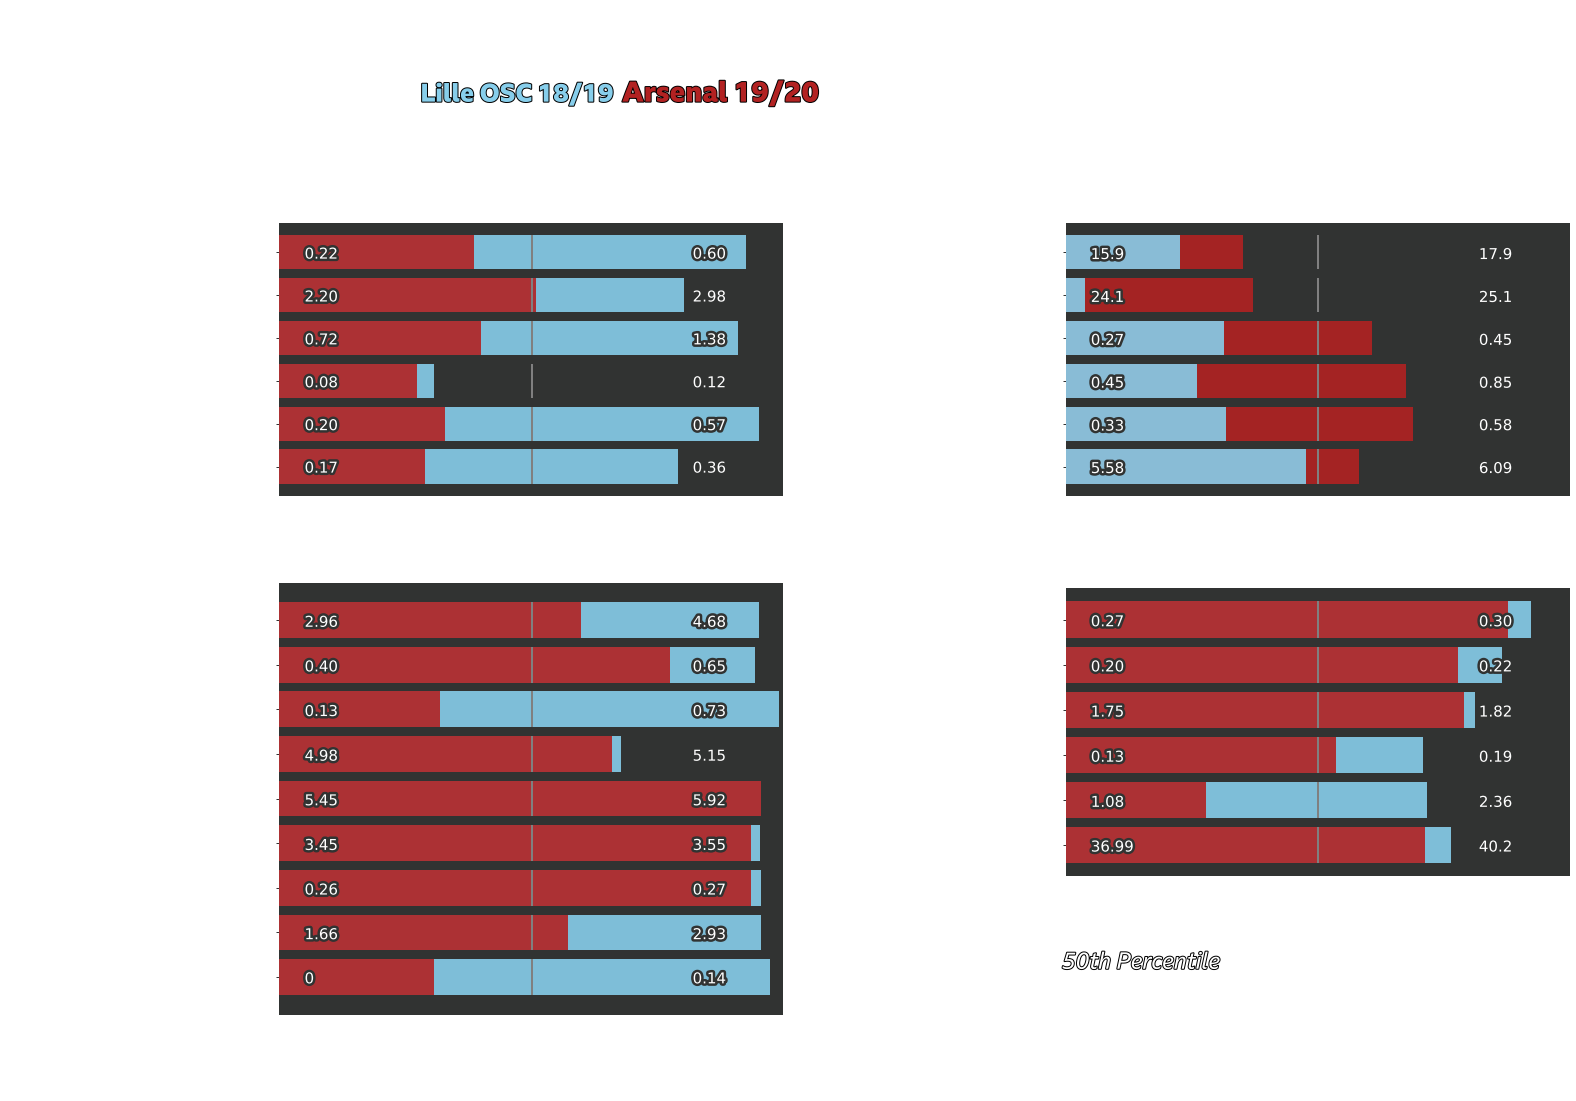

In [123]:
background = "#313332"
title_font = "BBC Reith Sans"
body_font = "BBC Reith Sans"
text_color = "#FFFFFF"

fig, ax = plt.subplots(figsize=(28,20))
plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}



ax1 = fig.add_axes([0.26,0.54,0.25,0.19]) # goalscoring actions

ax1.set_xlim(0,1)
# ax2.set_ylim(0,1)

ax1.patch.set_facecolor(background)

# Despine
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)


#Assign bars to a variable when plotting them
bars = ax1.barh(y_pos_att,values_att, linewidth=3, alpha=0.9, color='skyblue',zorder=2)
bars2 = ax1.barh(y_pos_att2,values_att2, linewidth=3, alpha=0.9, color='firebrick',zorder=3)

#Iterate through each bar, and get the number of the iteration to get the correct average from the main df
for idx, bar in enumerate(bars):

    #Get the location of the bottom left of the bar
    y0 = bar.xy[1]

    #Calcuate the top left by adding the height
    y1 = y0+bar.get_height()

    #Plot a vertical line for the average, at the y paramaters calculated above
    plt.vlines(att_1920.mean()[idx],y0,y1, color='grey',zorder=4,lw=2)


ax1.set_yticks(y_pos_att)
ax1.set_yticklabels(attributes_att,**csfont, fontsize=23, color='white')
ax1.get_xaxis().set_ticks([])
ax1.text(0.5,6,"Goalscoring",fontweight="bold", fontsize=25,fontfamily=title_font, color=text_color, ha='center')


d1=ax1.text(0.05,4.85,"0.22" ,fontsize=15,color='white')
d2=ax1.text(0.05,3.85,"2.20" ,fontsize=15,color='white')
d3=ax1.text(0.05,2.85,"0.72" ,fontsize=15,color='white')
d4=ax1.text(0.05,1.85,"0.08" ,fontsize=15,color='white')
d5=ax1.text(0.05,0.85,"0.20" ,fontsize=15,color='white')
d6=ax1.text(0.05,-0.14,"0.17" ,fontsize=15,color='white')
d1.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
d2.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
d3.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
d4.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
d5.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
d6.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])

e1=ax1.text(0.82,4.85,"0.60" ,fontsize=15,color='white')
e2=ax1.text(0.82,3.85,"2.98" ,fontsize=15,color='white')
e3=ax1.text(0.82,2.85,"1.38" ,fontsize=15,color='white')
e4=ax1.text(0.82,1.85,"0.12" ,fontsize=15,color='white')
e5=ax1.text(0.82,0.85,"0.57" ,fontsize=15,color='white')
e6=ax1.text(0.82,-0.14,"0.36" ,fontsize=15,color='white')
e1.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
e2.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
e3.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
e4.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
e5.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
e6.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])


#############################################################################################################



ax2 = fig.add_axes([0.65,0.54,0.25,0.19]) # defensive actions

ax2.set_xlim(0,1)
# ax2.set_ylim(0,1)

ax2.patch.set_facecolor(background)

# Despine
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)


#Assign bars to a variable when plotting them
bars = ax2.barh(y_pos,values, linewidth=3, alpha=0.9, color='skyblue',zorder=3)
bars2 = ax2.barh(y_pos2,values2, linewidth=3, alpha=0.9, color='firebrick',zorder=2)

#Iterate through each bar, and get the number of the iteration to get the correct average from the main df
for idx, bar in enumerate(bars):

    #Get the location of the bottom left of the bar
    y0 = bar.xy[1]

    #Calcuate the top left by adding the height
    y1 = y0+bar.get_height()

    #Plot a vertical line for the average, at the y paramaters calculated above
    plt.vlines(def_1920.mean()[idx],y0,y1, color='grey',zorder=4,lw=2)


ax2.set_yticks(y_pos)
ax2.set_yticklabels(attributes,**csfont, fontsize=23, color='white')
ax2.get_xaxis().set_ticks([])
ax2.text(0.5,6,"Defending",fontweight="bold", fontsize=25,fontfamily=title_font, color=text_color, ha='center')


f1=ax2.text(0.05,4.84,"15.9" ,fontsize=15,color='white')
f2=ax2.text(0.05,3.84,"24.1" ,fontsize=15,color='white')
f3=ax2.text(0.05,2.84,"0.27" ,fontsize=15,color='white')
f4=ax2.text(0.05,1.84,"0.45" ,fontsize=15,color='white')
f5=ax2.text(0.05,0.84,"0.33" ,fontsize=15,color='white')
f6=ax2.text(0.05,-0.15,"5.58" ,fontsize=15,color='white')
f1.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
f2.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
f3.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
f4.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
f5.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
f6.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])

g1=ax2.text(0.82,4.84,"17.9" ,fontsize=15,color='white')
g2=ax2.text(0.82,3.84,"25.1" ,fontsize=15,color='white')
g3=ax2.text(0.82,2.84,"0.45" ,fontsize=15,color='white')
g4=ax2.text(0.82,1.84,"0.85" ,fontsize=15,color='white')
g5=ax2.text(0.82,0.85,"0.58" ,fontsize=15,color='white')
g6=ax2.text(0.82,-0.15,"6.09" ,fontsize=15,color='white')
g1.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
g2.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
g3.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
g4.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
g5.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
g6.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])




#############################################################################################################



ax3 = fig.add_axes([0.65,0.276,0.25,0.2]) # passing

ax3.set_xlim(0,1)
# ax2.set_ylim(0,1)

ax3.patch.set_facecolor(background)

# Despine
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)


#Assign bars to a variable when plotting them
bars = ax3.barh(y_pos_pass,values_pass, linewidth=3, alpha=0.9, color='skyblue',zorder=2)
bars2 = ax3.barh(y_pos_pass2,values_pass2, linewidth=3, alpha=0.9, color='firebrick',zorder=3)

#Iterate through each bar, and get the number of the iteration to get the correct average from the main df
for idx, bar in enumerate(bars):

    #Get the location of the bottom left of the bar
    y0 = bar.xy[1]

    #Calcuate the top left by adding the height
    y1 = y0+bar.get_height()

    #Plot a vertical line for the average, at the y paramaters calculated above
    plt.vlines(pass_1920.mean()[idx],y0,y1, color='grey',zorder=4,lw=2)

ax3.set_yticks(y_pos_pass)
ax3.set_yticklabels(attributes_pass,**csfont, fontsize=23, color='white')
ax3.get_xaxis().set_ticks([])
ax3.text(0.5,6,"Passing",fontweight="bold", fontsize=25,fontfamily=title_font, color=text_color, ha='center')

h1=ax3.text(0.05,4.85,"0.27" ,fontsize=15,color='white')
h2=ax3.text(0.05,3.85,"0.20" ,fontsize=15,color='white')
h3=ax3.text(0.05,2.85,"1.75" ,fontsize=15,color='white')
h4=ax3.text(0.05,1.85,"0.13" ,fontsize=15,color='white')
h5=ax3.text(0.05,0.85,"1.08" ,fontsize=15,color='white')
h6=ax3.text(0.05,-0.14,"36.99" ,fontsize=15,color='white')
h1.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
h2.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
h3.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
h4.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
h5.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
h6.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])

i1=ax3.text(0.82,4.85,"0.30" ,fontsize=15,color='white')
i2=ax3.text(0.82,3.85,"0.22" ,fontsize=15,color='white')
i3=ax3.text(0.82,2.85,"1.82" ,fontsize=15,color='white')
i4=ax3.text(0.82,1.85,"0.19" ,fontsize=15,color='white')
i5=ax3.text(0.82,0.85,"2.36" ,fontsize=15,color='white')
i6=ax3.text(0.82,-0.14,"40.2" ,fontsize=15,color='white')
i1.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
i2.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
i3.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
i4.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
i5.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
i6.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])



#############################################################################################################


ax4 = fig.add_axes([0.26,0.18,0.25,0.30]) # possession

ax4.set_xlim(0,1)
# ax2.set_ylim(0,1)

ax4.patch.set_facecolor(background)

# Despine
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)


#Assign bars to a variable when plotting them
bars = ax4.barh(y_pos_pos,values_pos, linewidth=3, alpha=0.9, color='skyblue',zorder=2)
bars2 = ax4.barh(y_pos_pos2,values_pos2, linewidth=3, alpha=0.9, color='firebrick',zorder=3)

#Iterate through each bar, and get the number of the iteration to get the correct average from the main df
for idx, bar in enumerate(bars):

    #Get the location of the bottom left of the bar
    y0 = bar.xy[1]

    #Calcuate the top left by adding the height
    y1 = y0+bar.get_height()

    #Plot a vertical line for the average, at the y paramaters calculated above
    plt.vlines(pos_1920.mean()[idx],y0,y1, color='grey',zorder=4,lw=2)

ax4.set_yticks(y_pos_pos)
ax4.set_yticklabels(attributes_pos,**csfont, fontsize=23, color='white')
ax4.get_xaxis().set_ticks([])
ax4.text(0.5,9,"Possession",fontweight="bold", fontsize=25,fontfamily=title_font, color=text_color, ha='center')


j1=ax4.text(0.05,7.85,"2.96" ,fontsize=15,color='white')
j2=ax4.text(0.05,6.85,"0.40" ,fontsize=15,color='white')
j3=ax4.text(0.05,5.85,"0.13" ,fontsize=15,color='white')
j4=ax4.text(0.05,4.85,"4.98" ,fontsize=15,color='white')
j5=ax4.text(0.05,3.85,"5.45" ,fontsize=15,color='white')
j6=ax4.text(0.05,2.85,"3.45" ,fontsize=15,color='white')
j7=ax4.text(0.05,1.85,"0.26" ,fontsize=15,color='white')
j8=ax4.text(0.05,0.85,"1.66" ,fontsize=15,color='white')
j9=ax4.text(0.05,-0.14,"0" ,fontsize=15,color='white')
j1.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
j2.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
j3.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
j4.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
j5.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
j6.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
j7.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
j8.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
j9.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])


k9=ax4.text(0.82,7.85,"4.68" ,fontsize=15,color='white')
k8=ax4.text(0.82,6.85,"0.65" ,fontsize=15,color='white')
k7=ax4.text(0.82,5.85,"0.73" ,fontsize=15,color='white')
k6=ax4.text(0.82,4.85,"5.15" ,fontsize=15,color='white')
k5=ax4.text(0.82,3.85,"5.92" ,fontsize=15,color='white')
k4=ax4.text(0.82,2.85,"3.55" ,fontsize=15,color='white')
k3=ax4.text(0.82,1.85,"0.27" ,fontsize=15,color='white')
k2=ax4.text(0.82,0.85,"2.93" ,fontsize=15,color='white')
k1=ax4.text(0.82,-0.14,"0.14" ,fontsize=15,color='white')
k9.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
k8.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
k7.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
k6.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
k5.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
k4.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
k3.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
k2.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])
k1.set_path_effects([path_effects.withStroke(linewidth=5,foreground=background)])


# Add fancy arrow

style="Simple,tail_width=0.5,head_width=9,head_length=10"
kw = dict(arrowstyle=style, color="white")
a = patches.FancyArrowPatch((0.78,0.12), (0.838,0.2),
                            connectionstyle="arc3,rad=0.6", **kw,zorder=20,lw=1.5) #curved arrow
ax.add_patch(a)

p=ax.text(0.675,0.115, "50th Percentile", fontsize=23, fontfamily=body_font, color='white',fontstyle="italic")
p.set_path_effects([path_effects.withStroke(linewidth=2,foreground='black')])

fig.text(0.14,0.84, "Nicolas Pépé", fontsize=50, fontfamily=body_font, color=text_color, fontweight='bold')
fig.text(0.14,0.815, "Performance Metric comparison: ",fontsize=25, fontfamily=body_font, color=text_color,zorder=2)
n=fig.text(0.43,0.814, "Arsenal 19/20",fontsize=28, fontfamily=body_font, color='firebrick',zorder=2,fontweight='bold')
n.set_path_effects([path_effects.withStroke(linewidth=2,foreground='black')])
n1=fig.text(0.33,0.814, "Lille OSC 18/19",fontsize=25, fontfamily=body_font, color='skyblue',zorder=2,fontweight='bold')
n1.set_path_effects([path_effects.withStroke(linewidth=2,foreground='black')])
fig.text(0.14,0.793, "All values per 90 based on Percentile Ranking for respective league/season for MF/FWD",fontsize=20, fontfamily=body_font, color=text_color,zorder=2,fontstyle="italic")
fig.text(0.81, 0.85, "@jonollington",fontsize=23, fontfamily=body_font, color=text_color)
fig.text(0.75, 0.13, "data: FBRef via StatsBomb",fontsize=23, fontfamily=body_font, color=text_color, fontstyle="italic")


ax.axis("off")
plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("Pepe_hbar", bbox_inches='tight')
plt.show()